# HR Analytics

# Business Problem

How much money is your business losing to high employee turnover?
 


Let us look at some statistics:
1. The average cost to replace an 8dollar/hour employee is about 5,500 dollars, not including benefits.
   2017 Stat: 11 billion dollar is lost annually due to employee turnover.
2. The average direct cost for a new employee (not including training) is 57,968 dollars.
   2017 Stat: Cost of replacing entry level employees: 30-50% of their annual salary.


Replacing a high-level employee can cost a lot to the company. COst include :
1. Cost of training a new person.
2. Loss of productivity, because a new person may take several months to years to reach the same productivity levels as the experience guy
3. Cost of hiring a new person.
4. Cost of off-boarding

These statistics don’t paint a pretty picture about the state of employee retention. The good news is that you can use these statistics as a way to develop new strategies to retain employees for the long haul, and hopefully develop a new hiring process along the way

# Objective 

1. To see what Factors contribute the most to the Employee turnover.
2. To analyse and come up with interesting patterns that tells something about employee turnover
3. To create a model that accurately classifies if an employee leaves the company or not
2. To come up with a business plan to the company which will help them to reduce the employee turnovers

# Obtaining the Data

In [1]:
#Importing necessary packages to do data manipulation and Exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
df = pd.DataFrame.from_csv('HR_comma_sep.csv', index_col=None)

C:\Users\amogh\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


# Data Cleaning

In [3]:
#Let us see how the data looks
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Let us see if there are any missing values in the Data set

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no missing data here, this is a very clean data set.

# EDA

Hypothesis Generation

Before we begin to explore the data, it is very important to putforth Couple of hypothesis which we think might hold true based on the domain knowledge.

Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome.

Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect Employee Tunrover Rate in the HR Analytics Project:

a.satisfaction_level   
Satisfaction is very key at the company for any employee. Our hypothesis is lower the Satisfaction rate, higher the rate of turnover

b.number_project
The number of projects play a vital role in an Employeer's turnover. The Employee is highly likely to churn if he is on a single project or if he has been alotted to different projects till now.

c.promotion_last_5years : no promotion or not promoted much in the last 5 years, may make the employee assume the employer is not showing enough interest/ not giving the recognition the employee should be able to get. Lower the promotion level in the last 5 years, higher the chances of employee leaving the company

d.salary: Salary is crucial in the industry. If an employee feels his salary levels are low and not as per the expectations, he might leave the company for better opportunities outside.
 
e.Work_accident : A work accident is very troublesome to an employee. It may be from his side or from the copmany towards him. Both are likely to result in a churn.

f.last_evaluation: if the last evaluation was not so good for an employee, it implies he might have not got a good hike/ expected salary. This plays a vital role. Lower evaluation is a good indicator of employee churn

Let us start exploring our data based on these hypothesis in our mind and see if we can find any interesting patterns

In [5]:
df.shape

(14999, 10)

The data has 14999 entries and 10 variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The variable left is misclassified as integer, let us convert to onject

In [7]:
df['left'] = df['left'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null object
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


As we see 'left' is the target variable which we are intrested in. There are 2 categorical variables and 7 numerical variables


Let us get a overview of how our data looks

In [9]:
#numerical columns
df.describe(include = np.number)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [10]:
#categorical columns
df.describe(include = np.object)

,left,Department,salary
count,14999,14999,14999
unique,2,10,3
top,0,sales,low
freq,11428,4140,7316


let us see how our target variables looks like and its distribution

In [11]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

We see in the dataset, the ratio of left to not left is almost 1:3

In [12]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


we can get a rough idea like maybe low promotion in 5 years and low satisfaction level has made employees leave the company when compared with those who have not left the company

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null object
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [14]:
numeric =[]
categorical = []
for columns in df.columns.drop(['left']):
#     print (np.issubdtype(df[columns].dtype, np.number))
    if (df[columns].dtype == 'object'):
        categorical.append(columns)
        
    else:
        numeric.append(columns)

In [15]:
print(numeric)
print(categorical)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
['Department', 'salary']


Now that we have seperated the numerical and categorical features, let us proceed with the univariate analysis of the variables

In [16]:
f = pd.melt(df, value_vars=numeric)

C:\Users\amogh\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\amogh\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\amogh\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\amogh\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\amogh\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462:

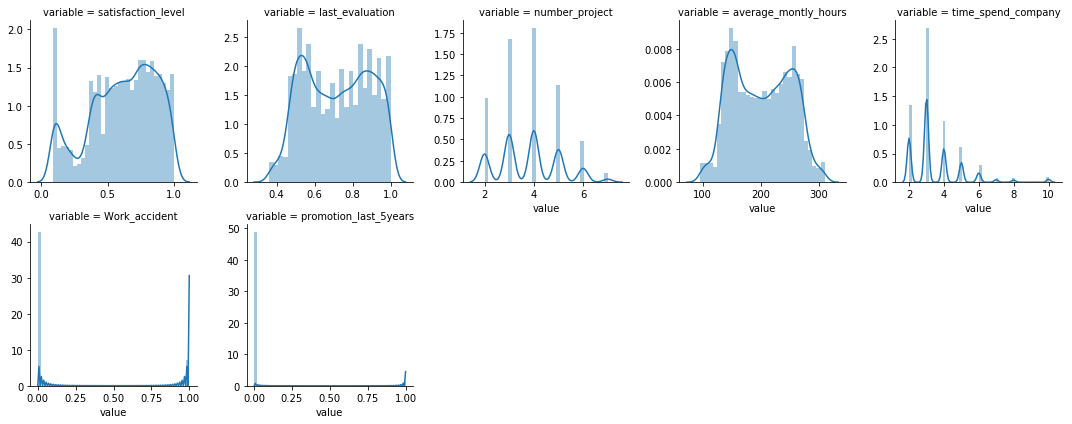

In [17]:
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [18]:
df[numeric].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [19]:
#Generic function for the plots
def plot_feature(df, col):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    if df[col].dtype != 'object':
        df[col].value_counts().sort_index().plot()
        plt.xlabel(col)
        plt.ylabel('counts')
        plt.subplot(1,2,2)
        sns.boxplot(x='left',y=col,data=df)
        
    
    else:
        sns.countplot(col,data = df)
        plt.xticks(rotation=-45)        
        mosaic(df, [col,'left'],gap=0.01, label_rotation=-45)
        
    

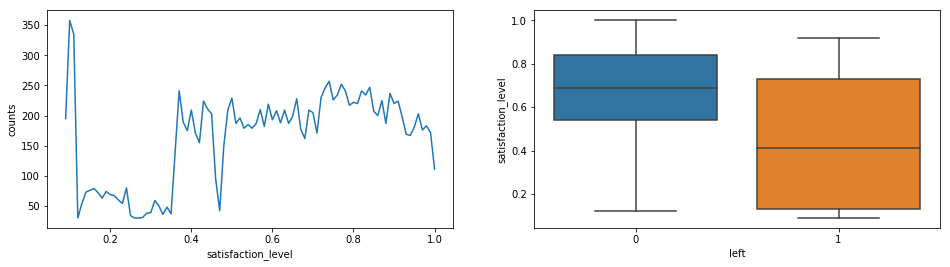

In [20]:
plot_feature(df,'satisfaction_level')

It is evident from the plot that lower the satisfaction, higher the probability of an employee leaving the company. This is in sync with our first hypothesis

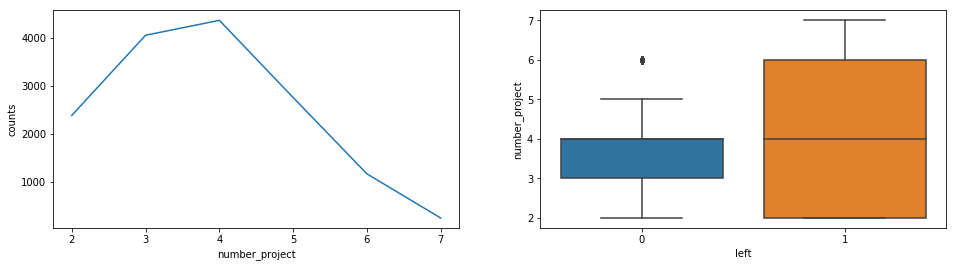

In [21]:
plot_feature(df,'number_project')

People with 3-4 projects are most likely to not leave the company. People with fewer number of projects or those who have done large number of projects till now are likely to change the company.

Our third hypothesis is about promotion since last 5 years, let us see how it compares with the employee tunrover.
Also the variable is misclassified as integer but it is a categorical variable of 0/1. Let us convert it to categorical variable


In [22]:
df['promotion_last_5years'] = df['promotion_last_5years'].astype(str)

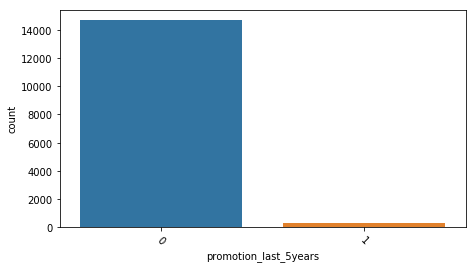

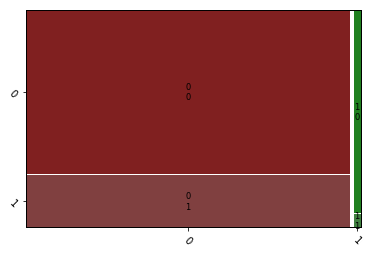

In [23]:
plot_feature(df,'promotion_last_5years')

In [24]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

We see that only 319 out of 15000 have got promoted in the last 5 years, which is less that 2.5% of the strength of the company. This may well be a strong reason for an employee to leave the company.
The factors which contribute to the employee promotion may be several, but promoting less employees that too this is for 5 years, is very harmful to the company

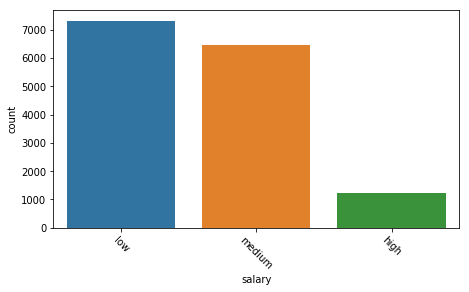

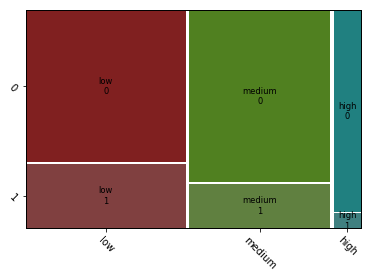

In [25]:
plot_feature(df,'salary')

Though this does not tell us indepth about the salary, it is evident that the employees with low salary have a higher rate of leaving the company, which is quite obvious in every company.

In [26]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

Again the variable work_accident has been misclassified as numerical , but it should be a categorical variable indicating 1/0 for the work accident

In [27]:
df['Work_accident'] = df['Work_accident'].astype(str)

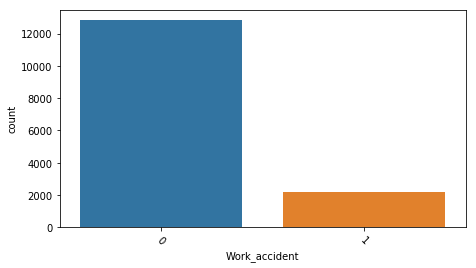

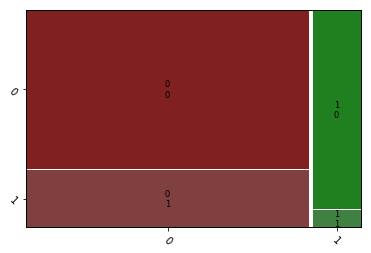

In [28]:
plot_feature(df,'Work_accident')

A work accident does not really have any effect on the employees leaving the company. Here those with no work accidents have higher ratio of leaving the company

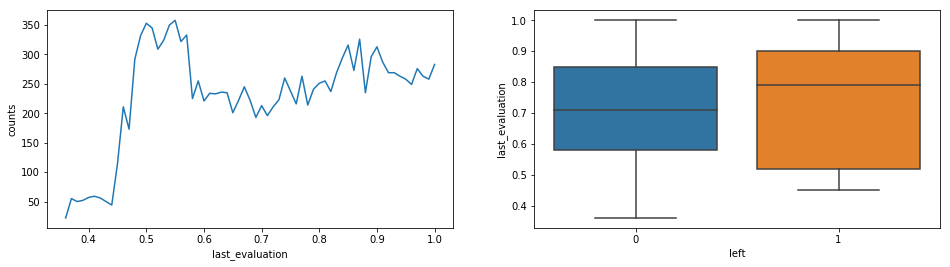

In [29]:
plot_feature(df,'last_evaluation')

Employees who got 0.5-0.6 in their last evaluation are higher in number compared to other rating counts. But as we see from the graph, the mdeian for those who left the company has higher rating than those who have lower rating. SO low performance rating does not really have any direct impact on the employees leaving the company

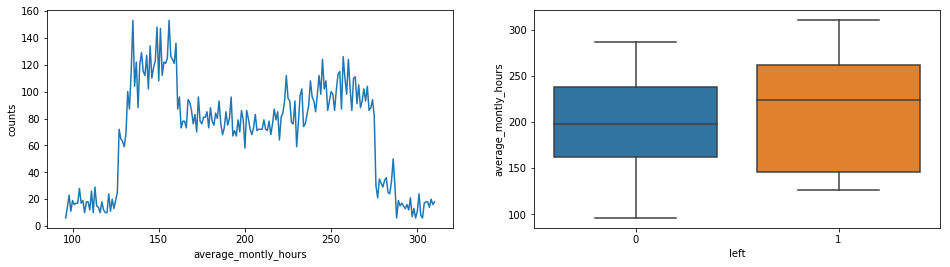

In [30]:
plot_feature(df,'average_montly_hours')

People who spend very large amount of time in the company may tend to leave the company. Though this is not a clear indication

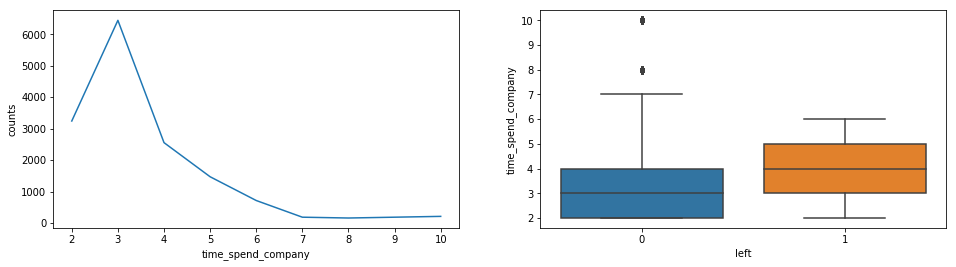

In [31]:
plot_feature(df,'time_spend_company')

People who have spent 2-3 years in a company are less likely to leave the company when company when compared to those who have spent on an average 4 years at the company

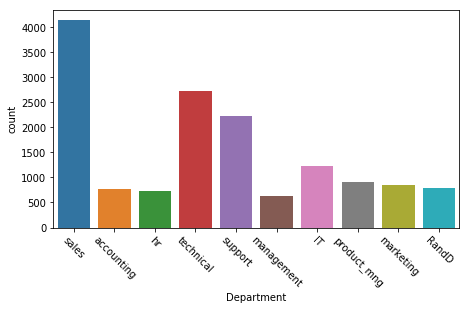

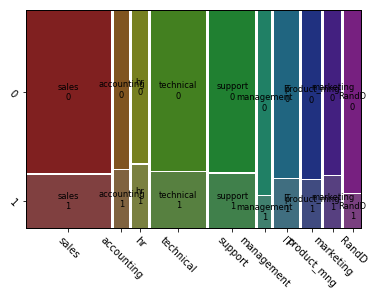

In [32]:
plot_feature(df,'Department')

In [33]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [34]:
dept_unique= df['Department'].unique()

Since the graph is not so clear, let us see which department has the highest proportion of employees leaving the company.

In [35]:
for item in dept_unique:
    left = round(df[df['Department'].values == item]['left'].value_counts()[1] / len(df[df['Department'].values == item]['left']),3)
    print (left , item)

0.245 sales
0.266 accounting
0.291 hr
0.256 technical
0.249 support
0.144 management
0.222 IT
0.22 product_mng
0.237 marketing
0.154 RandD


We see that Hr has the highest employee turnover rate, followed by accounting and technical departments

# Satisfaction VS Evaluation

- here are 3 distinct clusters for employees who left the company
- Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

- Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?
- Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

- Question: Could this cluster mean employees who "under-performed"?
- Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

- Question: Could this cluser mean that employees left because they found another job opportunity?

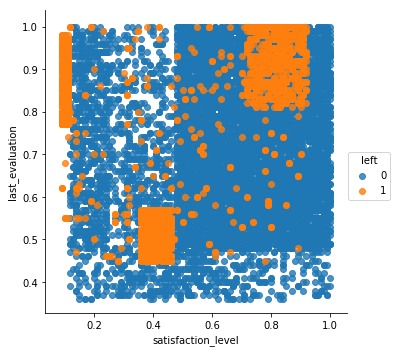

In [36]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=df,
           fit_reg=False, # No regression line
           hue='left')   # Color by evolution stage

# Correlation Matrix

In [37]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


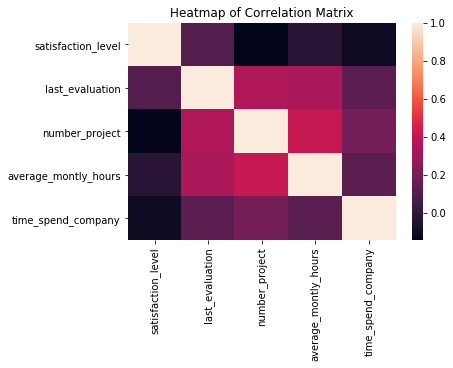

In [38]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

# PreProcessing

let us first seperate the numerical and the categorical variables and then convert the categorical features to numbers format which will be understood by the model better

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null object
left                     14999 non-null object
promotion_last_5years    14999 non-null object
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [40]:
numerical = []
categorical = []
for column in df.columns.drop('left'):
    if df[column].dtype == 'object':
        categorical.append(column)
    else:
        numerical.append(column)

In [41]:
print("Numerical Features= ",numerical)
print("Categorical features  = ",categorical)

Numerical Features=  ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
Categorical features  =  ['Work_accident', 'promotion_last_5years', 'Department', 'salary']


In [42]:
#COnverting the categorical features to dummies
categ_df = pd.get_dummies(df[categorical], drop_first= True)
numer_df = df[numerical]
new_df = pd.concat([categ_df,numer_df], axis= 1 )

In [43]:
new_df.shape

(14999, 18)

In [44]:
new_df.head()

,Work_accident_1,promotion_last_5years_1,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6
2,0,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3


We see the total columns is now 18 and that all the categorical features have been converted to numerical features, this will make the data more clearer to the models.

# Modeling

Splitting the data into training and test data

In [45]:
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, cross_validate, train_test_split
from sklearn import feature_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [47]:
X = new_df
Y = df['left']

In [48]:
X_train , X_test ,  Y_train , Y_test = train_test_split(X,Y, test_size = 0.15, random_state=100, stratify = Y)

# Logistic Regression

In [49]:
#Let us begin with the basic model of Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(Y_test, log_reg.predict(X_test)))

Logistic accuracy is 0.79


C:\Users\amogh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print(classification_report(Y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1714
           1       0.60      0.35      0.44       536

   micro avg       0.79      0.79      0.79      2250
   macro avg       0.71      0.64      0.66      2250
weighted avg       0.77      0.79      0.77      2250



# Using Cross-validation for better evaluation

In [51]:
#Area under the curve gives us a better understanding of how a model is performing in the classification problem more than the accuracy score

from sklearn import model_selection
log_reg_cv = LogisticRegression()
kfold = model_selection.KFold(n_splits = 10, random_state = 11)

In [52]:
log_Cv_auc = model_selection.cross_val_score(log_reg_cv,X_train, Y_train,cv= kfold,scoring = 'roc_auc')

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [53]:
print("The Logistic Regression AUC: %.3f and the STD is (%.3f)" % (log_Cv_auc.mean(), log_Cv_auc.std()))

The Logistic Regression AUC: 0.820 and the STD is (0.011)


# Decision Tree

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
print ("Decision Tree accuracy is %2.2f" % accuracy_score(Y_test, dt.predict(X_test)))

Decision Tree accuracy is 0.98


In [55]:
#using CV
dt_auc = model_selection.cross_val_score(DecisionTreeClassifier(),X_train, Y_train, cv=kfold, scoring= 'roc_auc')

In [56]:
print("The Decision Tree AUC: %.3f and the STD is (%.3f)" % (dt_auc.mean(), dt_auc.std()))

The Decision Tree AUC: 0.975 and the STD is (0.006)


In [57]:
#Confusion Matrix
print(classification_report(Y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1714
           1       0.94      0.97      0.96       536

   micro avg       0.98      0.98      0.98      2250
   macro avg       0.97      0.98      0.97      2250
weighted avg       0.98      0.98      0.98      2250



# Random Forest

In [58]:
rf = RandomForestClassifier(class_weight="balanced")

# Fit the RF Model
rf = rf.fit(X_train, Y_train)
print ("Random Forest accuracy is %2.2f" % accuracy_score(Y_test, rf.predict(X_test)))


Random Forest accuracy is 0.99


C:\Users\amogh\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
#using K-fold CV
rf_auc = model_selection.cross_val_score(RandomForestClassifier(), X_train, Y_train, cv= kfold, scoring='roc_auc')

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: Future

In [60]:
print("The Random Forest AUC: %.3f and the STD is (%.3f)" % (rf_auc.mean(), rf_auc.std()))

The Random Forest AUC: 0.988 and the STD is (0.005)


In [61]:
#Confusion matrix
print(classification_report(Y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.95      0.97       536

   micro avg       0.99      0.99      0.99      2250
   macro avg       0.99      0.97      0.98      2250
weighted avg       0.99      0.99      0.99      2250



# XGB Classifier

In [62]:
xgb =  XGBClassifier()
# Fit the XGB Model
xgb.fit(X_train, Y_train)
print ("XGboost Classifier accuracy is %2.2f" % accuracy_score(Y_test, xgb.predict(X_test)))

XGboost Classifier accuracy is 0.97


In [63]:
#using K-fold CV
xgb_auc = model_selection.cross_val_score(XGBClassifier(), X_train, Y_train, cv= kfold, scoring='roc_auc')


In [64]:
print("The XGboost classifiefr AUC: %.3f and the STD is (%.3f)" % (xgb_auc.mean(), xgb_auc.std()))

The XGboost classifiefr AUC: 0.988 and the STD is (0.003)


In [65]:
#Confusion matrix
print(classification_report(Y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1714
           1       0.97      0.91      0.94       536

   micro avg       0.97      0.97      0.97      2250
   macro avg       0.97      0.95      0.96      2250
weighted avg       0.97      0.97      0.97      2250



# Support Vector Classifier

In [66]:
from sklearn.svm import SVC 

svclassifier = SVC(kernel='rbf', probability=True)  

svclassifier.fit(X_train,Y_train)
print ("SVC accuracy is %2.2f" % accuracy_score(Y_test, svclassifier.predict(X_test)))

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC accuracy is 0.94


In [67]:
#using K-fold CV
svc_auc = model_selection.cross_val_score(SVC(), X_train, Y_train, cv= kfold, scoring='roc_auc')
print("The SVC AUC: %.3f and the STD is (%.3f)" % (svc_auc.mean(), svc_auc.std()))

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amogh\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

The SVC AUC: 0.964 and the STD is (0.006)


In [68]:
#Confusion matrix
print(classification_report(Y_test, svclassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1714
           1       0.87      0.90      0.89       536

   micro avg       0.94      0.94      0.94      2250
   macro avg       0.92      0.93      0.92      2250
weighted avg       0.95      0.94      0.95      2250



In [69]:
Y_t = np.array(Y_test)

# ROC Graph

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


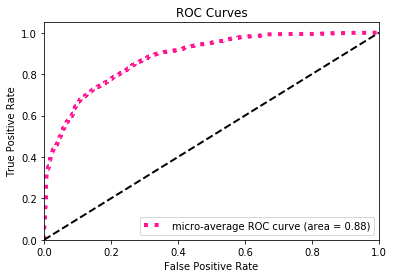

In [70]:
import scikitplot as skplt
#Roc curve for logistic regression
y_log = log_reg.predict_proba(X_test)
skplt.metrics.plot_roc_curve(Y_test, y_log, curves=('micro avg'))
plt.show()

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


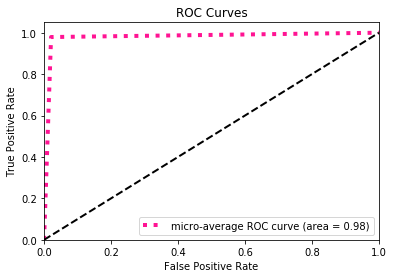

In [71]:
#Decision Tree
skplt.metrics.plot_roc_curve(Y_test, dt.predict_proba(X_test), curves=('micro avg'))
plt.show()

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


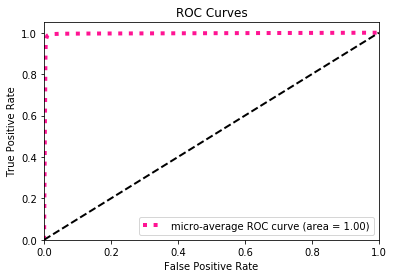

In [72]:
#Random FOrest
skplt.metrics.plot_roc_curve(Y_test, rf.predict_proba(X_test), curves=('micro avg'))
plt.show()

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


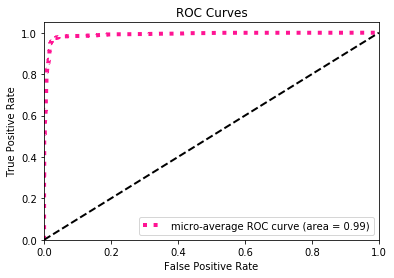

In [73]:
#XGBoost
skplt.metrics.plot_roc_curve(Y_test, xgb.predict_proba(X_test), curves=('micro avg'))
plt.show()

C:\Users\amogh\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


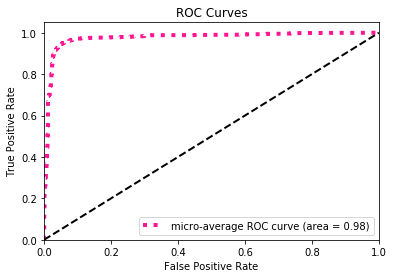

In [74]:
#SVC
skplt.metrics.plot_roc_curve(Y_test, svclassifier.predict_proba(X_test), curves=('micro avg'))
plt.show()

In [75]:
#Let us build a confusion matrix for Random forest Moddel
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, rf.predict(X_test))

array([[1711,    3],
       [  26,  510]], dtype=int64)

In [76]:
Y_test.value_counts()

0    1714
1     536
Name: left, dtype: int64

Our Model is identifying good number of True positives and True Negatives. It has 26 false negatives and 3 false positives


# Random Forest Feature Importance

In [77]:

# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction_level,0.330457
1,time_spend_company,0.212642
2,number_project,0.158420
3,last_evaluation,0.145584
4,average_montly_hours,0.111154
5,Work_accident_1,0.010045
6,Department_technical,0.005255
7,salary_medium,0.005248
8,salary_low,0.004507
9,Department_sales,0.003729


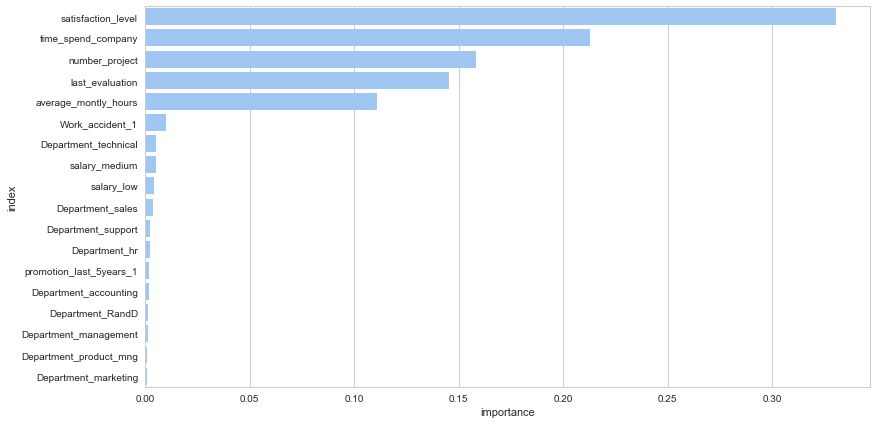

In [78]:

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [79]:
rf.predict_proba(X_test)

array([[1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ]])

# Conclusion

- Based on the probability of an employee leaving the company, the company should take time to discuss with an employee how he is feeling at the company and take measures to retain them. Some of them can be like giving incentives, bonus , good hike, satisfying project depending on their needs if it is possible. 
- We can also give training to employees so as to increase their knowledge capacities and make them confident in the company.
- We also saw that from the feature importance that satisfaction is a major contributor to the employee turnover at the company. The company should primarily make sure that the companies policies are geared towards satisfying the people and keeping them happy under stressful circumstances. The company can take their employees like twice a year to an outing or team lunch which will make them very happy.
- The company should make sure it promotes more number of employees every year because only 300 out of the 15000 were promoted in the last 5 years, which averages to 60 per year, which is way too less
- The company should make sure that the employees have ideal number of projects and are not bombarded with multiple projects or are they left jobless to keep them going
- Special care should be given to those who have spent more than 4 years at the company, because they are more likely to leave the company and are very expensive to replace. 